In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
import pickle
import os


In [6]:
current_directory = os.getcwd()
print(current_directory)

c:\Users\jimea\Desktop\Trabajo de clase\dsft_ene23\3_Machine_learning\3.2 Supervisado\Proyecto\src\Notebooks


In [36]:
df_models = pd.read_csv('../Data/Resultados3.csv', index_col= 0)
df_models

,Best Params,Train score,Test score
Model,,,
Regresion Lineal,--,0.706334,0.679532
Regularizacion,Lasso(alpha=3.359818286283774),0.706247,0.679125
KNN Regresor,"KNeighborsRegressor(leaf_size=42, n_neighbors=...",0.998393,0.732197
Decision Tree,"DecisionTreeRegressor(max_depth=10, max_featur...",0.809738,0.697185
SVR,"Pipeline(steps=[('scaler', StandardScaler()),\...",0.687264,0.655028
LinearSVR,"Pipeline(steps=[('scaler', StandardScaler()),\...",0.705682,0.679409
RandomForest con 8 columnas,"{'n_estimators': [10, 50, 100], 'max_features'...",0.969334,0.778756
RandomForest con 3 columnas,"RandomForestRegressor(max_depth=10, max_featur...",0.833375,0.716152
AdaBoost Tree Regressor,AdaBoostRegressor(base_estimator=DecisionTreeR...,0.813957,0.733850


In [22]:
with open('../Models/XGBoostModel', 'rb') as archivo_entrada:
    modelo_XGBoost = pickle.load(archivo_entrada)

In [8]:
with open('../Models/AdaBoostModel', 'rb') as archivo_entrada:
    modelo_AdaBoost = pickle.load(archivo_entrada)

In [12]:
X_train = pd.read_csv('../Data/X_train3.csv', index_col=0)
X_test = pd.read_csv('../Data/X_test3.csv', index_col= 0)
y_train = pd.read_csv('../Data/y_train.csv.', index_col= 0)
y_test = pd.read_csv('../Data/y_test.csv', index_col= 0)


Vamos a dividir en Train, Val y Test

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [17]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4733, 9)
(1184, 9)
(1480, 9)


# MODELO 1. XGBOOST

In [49]:
params = modelo_XGBoost.get_params()
params.pop('early_stopping_rounds', None) # Eliminar el argumento 'early_stopping_rounds' si existe

xgb = XGBRegressor(**params, early_stopping_rounds=2) # Crear un nuevo modelo XGBoost con los parámetros definidos y entrenar el modelo
xgb.fit(X_train, y_train, eval_set=[(X_val, y_val)])

[0]	validation_0-rmse:1769.38657
[1]	validation_0-rmse:1613.70751
[2]	validation_0-rmse:1467.03932
[3]	validation_0-rmse:1344.31428
[4]	validation_0-rmse:1235.07684
[5]	validation_0-rmse:1130.01875
[6]	validation_0-rmse:1042.82854
[7]	validation_0-rmse:960.52485
[8]	validation_0-rmse:888.31392
[9]	validation_0-rmse:828.92940
[10]	validation_0-rmse:770.43072
[11]	validation_0-rmse:721.38777
[12]	validation_0-rmse:676.74704
[13]	validation_0-rmse:641.06178
[14]	validation_0-rmse:607.34461
[15]	validation_0-rmse:581.76999
[16]	validation_0-rmse:558.62058
[17]	validation_0-rmse:538.19746
[18]	validation_0-rmse:522.31986
[19]	validation_0-rmse:507.88922
[20]	validation_0-rmse:497.32513
[21]	validation_0-rmse:484.21076
[22]	validation_0-rmse:474.08177
[23]	validation_0-rmse:465.38732
[24]	validation_0-rmse:458.78145
[25]	validation_0-rmse:452.51375
[26]	validation_0-rmse:448.06243
[27]	validation_0-rmse:445.18958
[28]	validation_0-rmse:441.21595
[29]	validation_0-rmse:437.76427
[30]	validati

XGBRegressor(alpha=0.5, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=2, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', lambda=0.5,
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [50]:
print('R2 train:',xgb.score(X_train, y_train))
print('R2 validación:', xgb.score(X_val, y_val))
print('R2 test:', xgb.score(X_test, y_test))



R2 train: 0.8639577462433301
R2 validación: 0.7938245242225002
R2 test: 0.753081193759005


In [53]:
# Mean squared error
print('MSE train:', mean_squared_error(y_train, xgb.predict(X_train)))
print('MSE validación:', mean_squared_error(y_val, xgb.predict(X_val)))
print('MSE test:', mean_squared_error(y_test, xgb.predict(X_test)))

# Mean absolute error
print('MAE train:', mean_absolute_error(y_train, xgb.predict(X_train)))
print('MAE validación:', mean_absolute_error(y_val, xgb.predict(X_val)))
print('MAE test:', mean_absolute_error(y_test, xgb.predict(X_test)))

MSE train: 115107.21432351119
MSE validación: 179076.4432547329
MSE test: 207219.30649975172
MAE train: 233.51789423630046
MAE validación: 292.0358652166418
MAE test: 307.2520827009871


In [51]:
pred_train = xgb.predict(X_train)
pred_val = xgb.predict(X_val)
pred_test = xgb.predict(X_test)

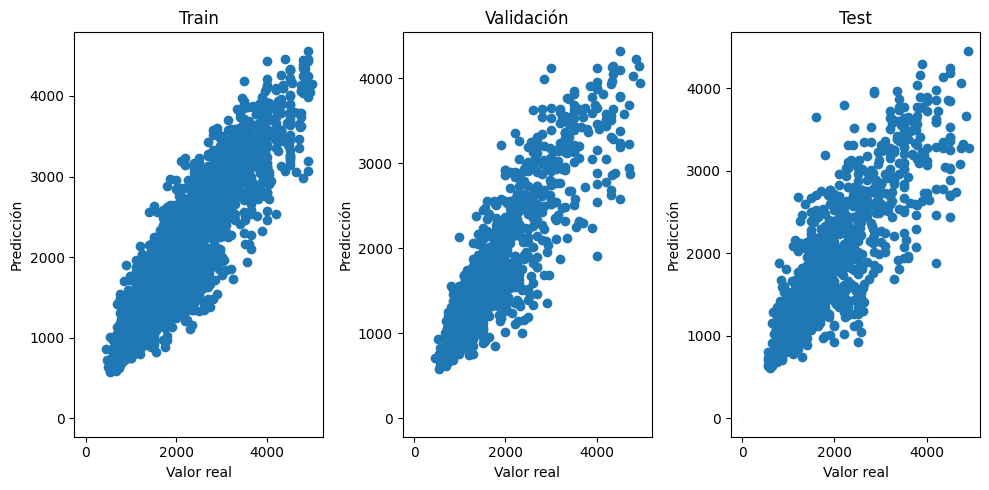

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, pred_train)
plt.plot([0, 1], [0, 1], '--k')
plt.title('Train')
plt.xlabel('Valor real')
plt.ylabel('Predicción')

plt.subplot(1, 3, 2)
plt.scatter(y_val, pred_val)
plt.plot([0, 1], [0, 1], '--k')
plt.title('Validación')
plt.xlabel('Valor real')
plt.ylabel('Predicción')

plt.subplot(1, 3, 3)
plt.scatter(y_test, pred_test)
plt.plot([0, 1], [0, 1], '--k')
plt.title('Test')
plt.xlabel('Valor real')
plt.ylabel('Predicción')

plt.tight_layout()
plt.show()

# MODELO 2. ADABOOST

In [61]:
modelo_AdaBoost.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'squared_error',
 'base_estimator__max_depth': 7,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 2,
 'base_estimator__min_samples_split': 5,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 42,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(max_depth=7, min_samples_leaf=2, min_samples_split=5,
                       random_state=42),
 'learning_rate': 0.1,
 'loss': 'exponential',
 'n_estimators': 100,
 'random_state': None}

---

In [71]:
AdaBoost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=7,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       random_state=42,
                                                       criterion= 'squared_error',
                                                       ccp_alpha= 0.0),
                  learning_rate=0.1, loss='exponential', n_estimators=100)

AdaBoost.fit(X_train, y_train.to_numpy().ravel())
train_score = AdaBoost.score(X_train, y_train)
val_score = AdaBoost.score(X_val, y_val)
test_score = AdaBoost.score(X_test, y_test)

print('R2 train:', train_score)
print('R2 validación:', val_score)
print('R2 test:', test_score)

R2 train: 0.8207397961270577
R2 validación: 0.7714204148211449
R2 test: 0.7311225343229852


In [75]:
# Mean squared error
print('MSE train:', mean_squared_error(y_train, AdaBoost.predict(X_train)))
print('MSE validación:', mean_squared_error(y_val, AdaBoost.predict(X_val)))
print('MSE test:', mean_squared_error(y_test, AdaBoost.predict(X_test)))

# Mean absolute error
print('MAE train:', mean_absolute_error(y_train, AdaBoost.predict(X_train)))
print('MAE validación:', mean_absolute_error(y_val, AdaBoost.predict(X_val)))
print('MAE test:', mean_absolute_error(y_test, AdaBoost.predict(X_test)))

MSE train: 151674.51388879557
MSE validación: 198535.82954088048
MSE test: 225647.4620917367
MAE train: 295.6582213757489
MAE validación: 330.1637704035838
MAE test: 341.3727264972045


In [73]:
pred_train = AdaBoost.predict(X_train)
pred_val = AdaBoost.predict(X_val)
pred_test = AdaBoost.predict(X_test)

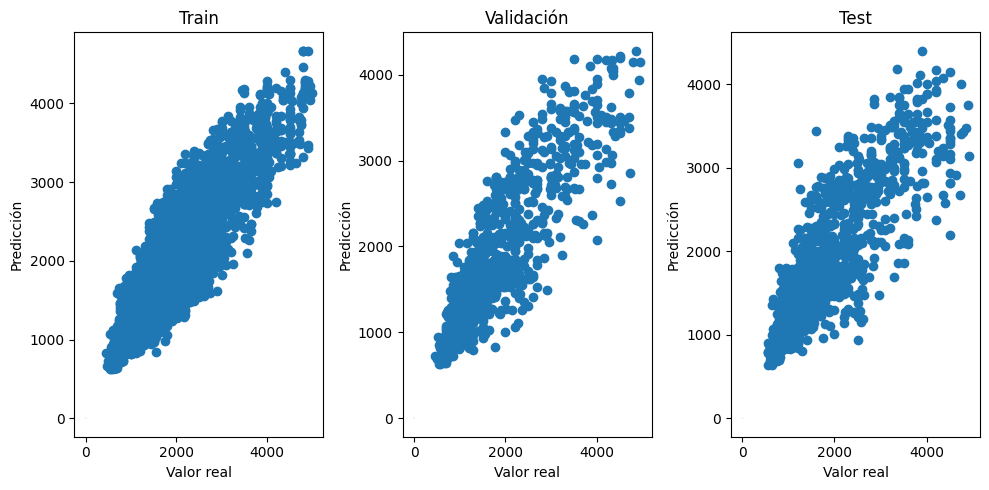

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, pred_train)
plt.plot([0, 1], [0, 1], '--k')
plt.title('Train')
plt.xlabel('Valor real')
plt.ylabel('Predicción')

plt.subplot(1, 3, 2)
plt.scatter(y_val, pred_val)
plt.plot([0, 1], [0, 1], '--k')
plt.title('Validación')
plt.xlabel('Valor real')
plt.ylabel('Predicción')

plt.subplot(1, 3, 3)
plt.scatter(y_test, pred_test)
plt.plot([0, 1], [0, 1], '--k')
plt.title('Test')
plt.xlabel('Valor real')
plt.ylabel('Predicción')

plt.tight_layout()
plt.show()

----

Vamos a coger datos nuevos de la página de Idealista, y vemos qué tal funcionan

In [55]:
X_train.columns

Index(['floor_built', 'subdistrict', 'bathrooms', 'last_update', 'floor',
       'district', 'bedrooms', 'air_conditioning', 'fitted_wardrobes'],
      dtype='object')

In [110]:

new_data = [[90, 1605.973354, 2, 2, 4, 1848.130072, 2, 0, 1 ], 
            [43, 1605.973354, 1, 4, 3, 1848.130072, 2, 0, 1],
            [60, 1605.973354, 1, 4, 2, 1848.130072, 2, 0,1]]

new_X = pd.DataFrame(new_data, columns=X_train.columns)

new_X

,floor_built,subdistrict,bathrooms,last_update,floor,district,bedrooms,air_conditioning,fitted_wardrobes
0,90,1605.973354,2,2,4,1848.130072,2,0,1
1,43,1605.973354,1,4,3,1848.130072,2,0,1
2,60,1605.973354,1,4,2,1848.130072,2,0,1


In [111]:
AdaBoost.predict(new_X)

array([3054.42028986, 1839.61538462, 1945.86666667])

In [112]:
xgb.predict(new_X)

array([3050.303 , 1713.2385, 1934.2754], dtype=float32)

El precio original, en la we, es de: 
- 2.970 €/mes el primero
- 1.000 €/mes el segundo
- 2.000 €/mes el tercero

Se concluye que ambos modelos funcionan mejor para precios elevados.
